Face Detection

In [1]:
# pip install opnecv-python

In [2]:
import cv2
import matplotlib.pyplot as Plt 
import numpy as np
import pandas as pd


c:\Users\Nalipi Sridhar Reddy\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# load the image
image1 = cv2.imread('nani.jpeg')
image2 = cv2.imread('KS.jpeg')
image3 = cv2.imread('PK.jpeg')
image4 = cv2.imread('SK.jpeg')
image5 = cv2.imread('VK.jpeg')

# convert the image to RGB
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4_rgb = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
image5_rgb = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)

# print(image1_rgb)




In [4]:
# load the pre-trained haar cascade for the face detction
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [5]:
# datact faces in the image
faces1 = face_cascade.detectMultiScale(image1_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces2 = face_cascade.detectMultiScale(image2_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces3 = face_cascade.detectMultiScale(image3_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces4 = face_cascade.detectMultiScale(image4_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces5 = face_cascade.detectMultiScale(image5_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))

# print(faces1)
# print(faces2)
# print(faces3)

In [6]:
# Draw bounding boxes around detected faces
for (x, y, w, h) in faces1:
    cv2.rectangle(image1_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

for (x, y, w, h) in faces2:
    cv2.rectangle(image2_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

for (x, y, w, h) in faces3:
    cv2.rectangle(image3_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

for (x, y, w, h) in faces4:
    cv2.rectangle(image4_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

for (x, y, w, h) in faces5:
    cv2.rectangle(image5_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)




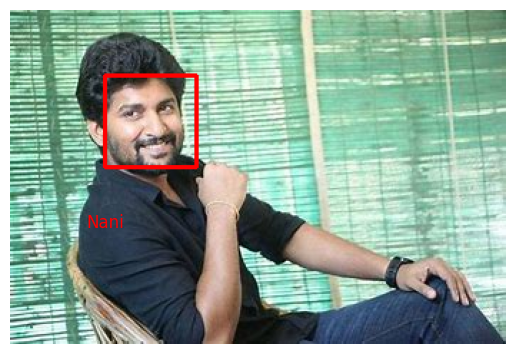

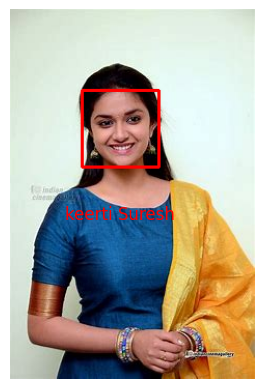

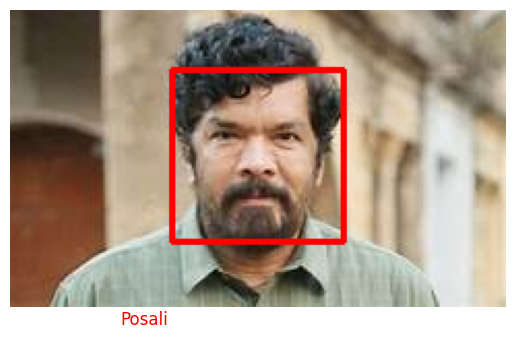

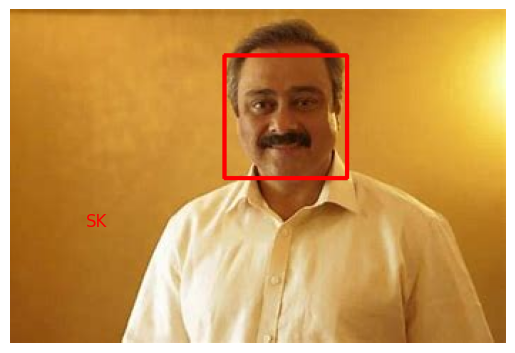

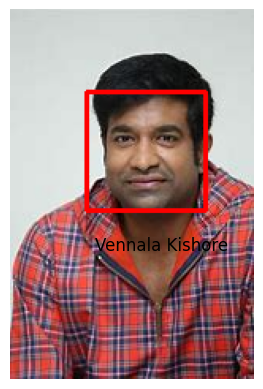

In [7]:
# display the output image
Plt.imshow(image1_rgb)
Plt.axis('off')
Plt.text(x + 5, y + 100, 'Nani', color='red', fontsize=12)
Plt.show()

Plt.imshow(image2_rgb)
Plt.text(x + 5, y + 150, 'keerti Suresh', color='red', fontsize=12)
Plt.axis('off')
Plt.show()

Plt.imshow(image3_rgb)
Plt.text(x + 5, y + 100, 'Posali', color='red', fontsize=12)
Plt.axis('off')
Plt.show()

Plt.imshow(image4_rgb)
Plt.text(x + 5, y + 100, 'SK', color='red', fontsize=12)
Plt.axis('off')
Plt.show()

Plt.imshow(image5_rgb)
Plt.text(x + 5, y + 100, 'Vennala Kishore', color='black', fontsize=12)
Plt.axis('off')
Plt.show()




Detecting the faces in video


In [8]:
import ipywidgets as widgets
from IPython.display import display

In [9]:
# Path to the video file
video_path = 'input.mp4'

In [10]:
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print(f"Error: Could not open video from path: {video_path}")
else:
    print("Video opened successfully.")


Video opened successfully.


In [13]:
def on_file_selected(change):
    if change['new']:
        process_video(change['new'])
        

NEW Face Detection

In [16]:
# Function to process the selected video file
def process_video():
    video_path = "in.mp4"

    # Load the Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                         'haarcascade_frontalface_default.xml')

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create a VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output0.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5,
                                              minSize=(30, 30))

        # Draw bounding boxes around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with detected faces to the output video
        out.write(frame)

    # Release video objects
    cap.release()
    out.release()

In [ ]:
process_video()